## Importing libraries

In [310]:
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [311]:
np.random.seed(0)

segmentOne=np.random.randn(2000//3,2)+np.array([2,2])
segmentTwo=np.random.randn(2000//3,2)+np.array([-3,-3])
segmentThree=np.random.randn(2000//3,2)+np.array([-5,3])

In [312]:
X=np.concatenate((segmentOne,segmentTwo,segmentThree))

### Print Shape

In [313]:
X.shape

(1998, 2)

## Model

### Initialize clusters randomly

In [314]:
k=3

In [315]:
centers=X[np.random.choice(np.arange(X.shape[0]),size=k)]
centers

array([[-2.1908197 , -4.19809288],
       [ 2.82455722,  2.53117837],
       [-6.21251574,  2.91940148]])

### Plot clusters

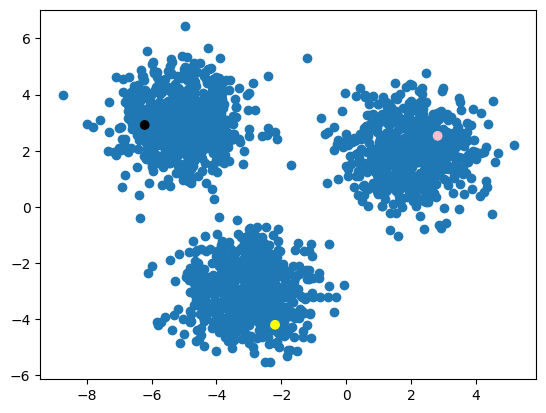

In [316]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],c=['yellow','pink','black'])

### Find points's clusters and find new clusters

In [317]:
def reCluster(X,centers):
    clusters=np.array([])
    for i in X:
        distance=[np.linalg.norm(x-i) for x in centers]
        clusters=np.append(clusters,np.argmin(distance))
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=clusters)
    plt.scatter(centers[:,0],centers[:,1],c='red')
    plt.show()
    newCenters=np.array([])
    for i in range(k):
        newCenters=np.append(newCenters,np.array(np.mean(X[clusters==i],axis=0)))
    newCenters=newCenters.reshape(-1,X.shape[1])
    return newCenters

### Loop until convergence

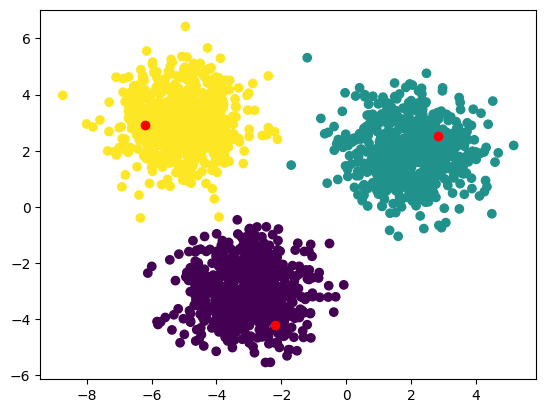

[[-3.043441   -2.9886384 ]
 [ 1.97820946  1.96453641]
 [-5.09121122  2.99986439]]


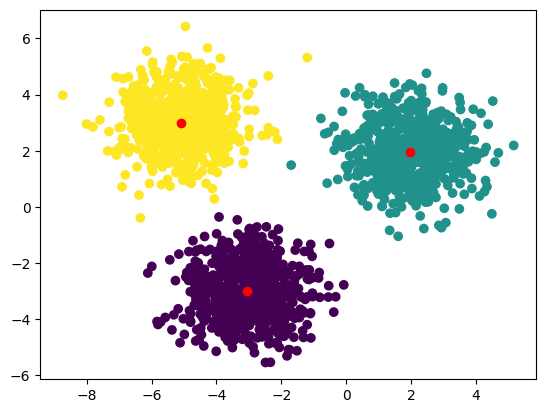

[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]


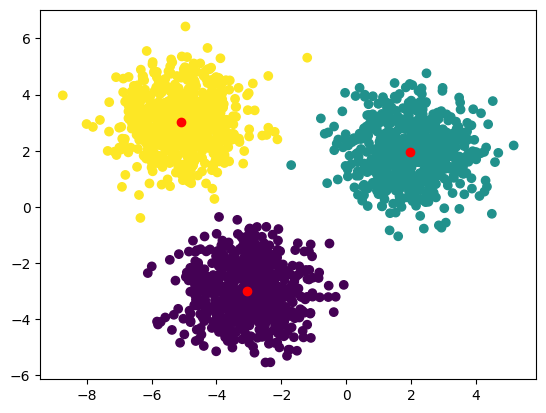

Convergence in : 2 iterations


In [318]:
count=0
for _ in range(10):
    prev=centers
    centers=reCluster(X,centers)
    if np.array_equal(prev,centers):
        break
    print(centers)
    count+=1
print(f"Convergence in : {count} iterations")